In [1]:
# based on: https://towardsdatascience.com/remove-text-from-images-using-cv2-and-keras-ocr-24e7612ae4f4
from matplotlib import pyplot as plt
import numpy as np

import cv2

import keras_ocr

# Example 1

In [2]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\MatiX\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\MatiX\.keras-ocr\crnn_kurapan.h5


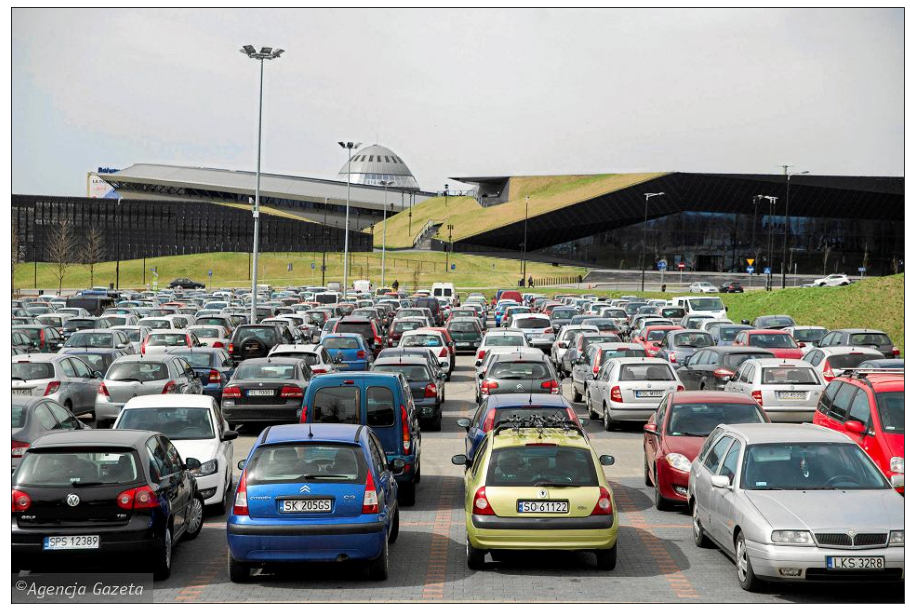

In [3]:
IMAGE_PATH_PARKING = '../data/parking.jpg'

img = keras_ocr.tools.read(IMAGE_PATH_PARKING)

plt.figure(figsize=(16, 12))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
prediction_groups = pipeline.recognize([img])
len(prediction_groups)

1

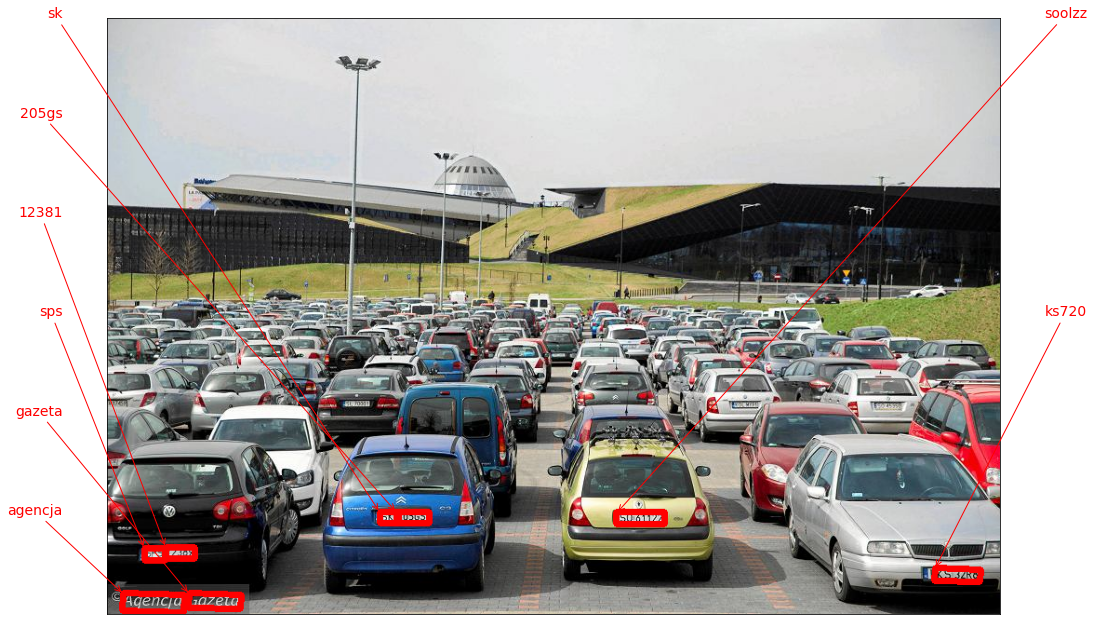

In [5]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(1, 1, 1)
keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0], ax=ax)
plt.show()

In [6]:
def get_midpoint(x1, y1, x2, y2):
    x_mid = (x1 + x2) // 2
    y_mid = (y1 + y2) // 2
    return int(x_mid), int(y_mid)

def inpaint_text_from_img(img, predictions):
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    for _, ((x0, y0), (x1, y1), (x2, y2), (x3, y3)) in predictions:
        x_mid0, y_mid0 = get_midpoint(x1, y1, x2, y2)
        x_mid1, y_mid1 = get_midpoint(x0, y0, x3, y3)
        
        thickness = int(np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mid1), 255, thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
        
    return img

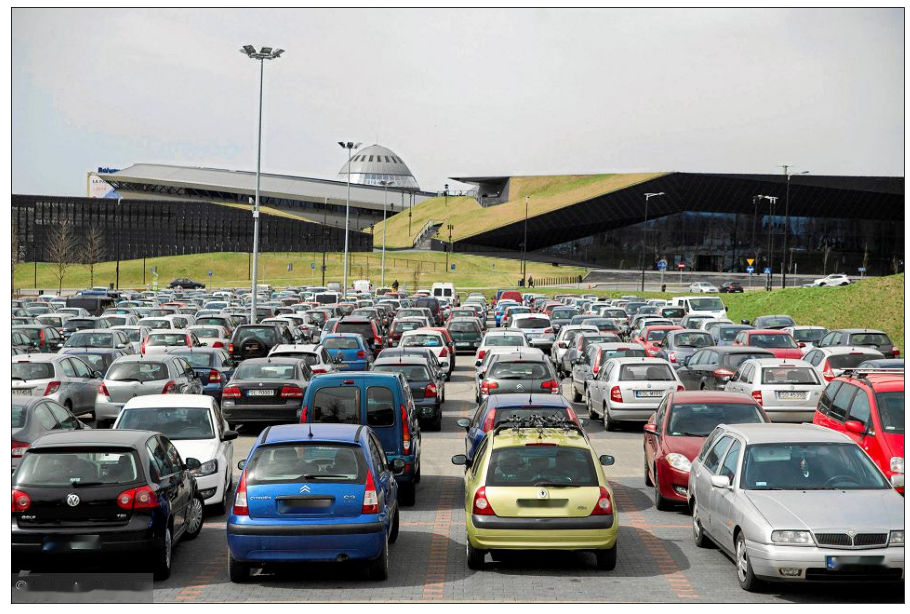

In [7]:
no_text_img = inpaint_text_from_img(img, prediction_groups[0])

plt.figure(figsize=(16, 12))
plt.imshow(no_text_img)
plt.xticks([])
plt.yticks([])
plt.show()

## Whole pipeline

In [8]:
def inpaint_text_from_path(pipeline, path, show_detections=False, figsize=(16, 12)):
    img = keras_ocr.tools.read(path)
    prediction_groups = pipeline.recognize([img])
    if show_detections:
        plt.figure(figsize=(16, 12))
        ax = plt.subplot(1, 1, 1)
        keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0], ax=ax)
        plt.show()
        
    img = inpaint_text_from_img(img, prediction_groups[0])
    
    plt.figure(figsize=(16, 12))
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

    # return img
    return None

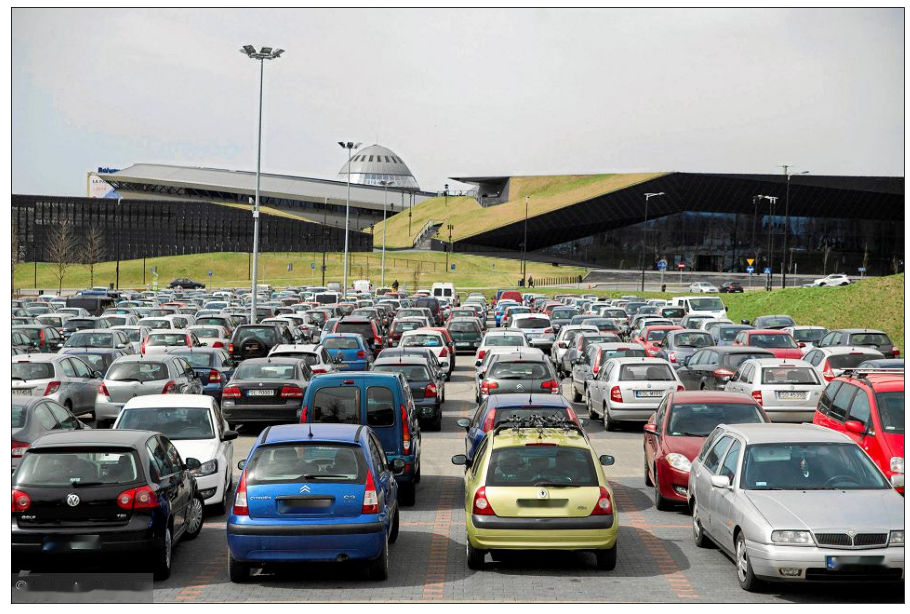

In [9]:
inpaint_text_from_path(pipeline, IMAGE_PATH_PARKING)

# Example 2

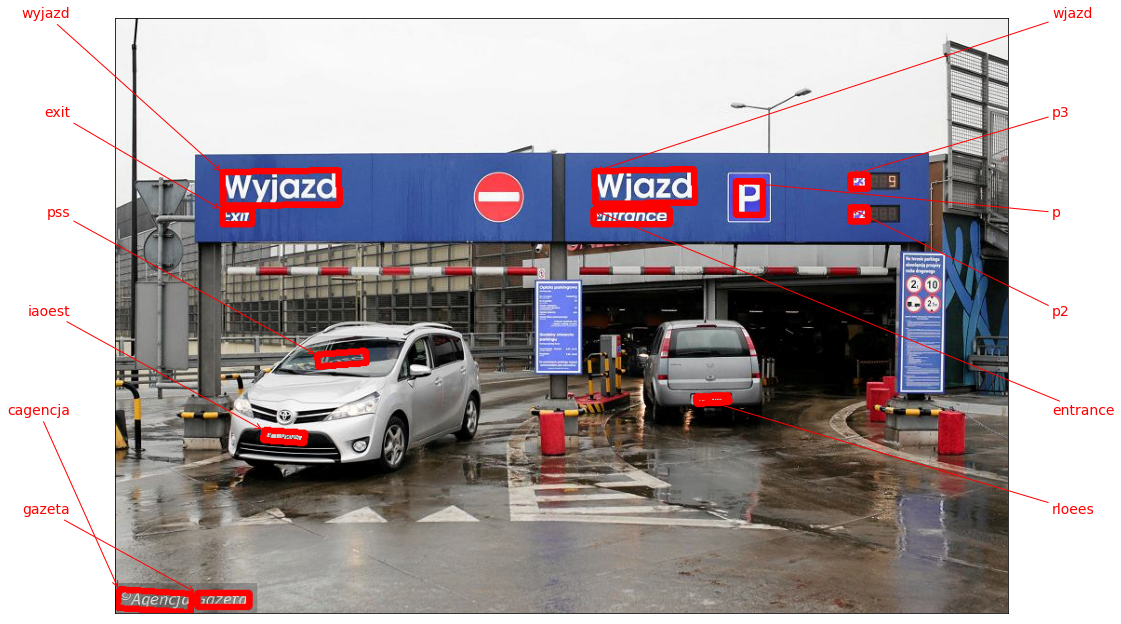

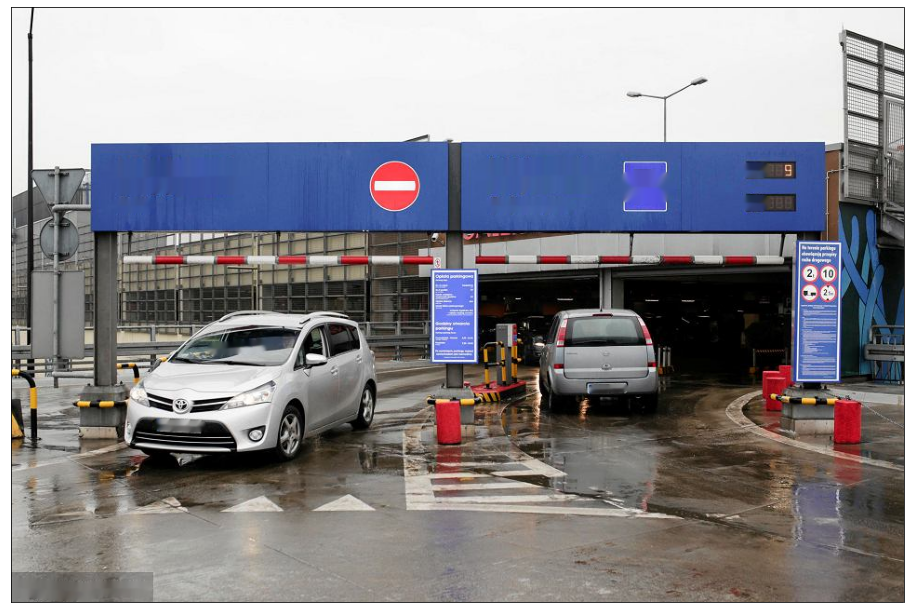

In [10]:
IMAGE_PATH_PARKING_2 = '../data/parking_2.jpg'

inpaint_text_from_path(pipeline, IMAGE_PATH_PARKING_2, show_detections=True)